# Diabetes Classification using PyCaret

In [1]:
import pandas as pd               
import matplotlib.pyplot as plt   
import seaborn as sns   

import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes = pd.read_csv("E:/Medium/Diabetes/diabetes.csv")
print(diabetes)

     pregnant  glucose  pressure  triceps  insulin  mass  pedigree  age  \
0           1       89        66       23       94  28.1     0.167   21   
1           0      137        40       35      168  43.1     2.288   33   
2           3       78        50       32       88  31.0     0.248   26   
3           2      197        70       45      543  30.5     0.158   53   
4           1      189        60       23      846  30.1     0.398   59   
..        ...      ...       ...      ...      ...   ...       ...  ...   
387         0      181        88       44      510  43.3     0.222   26   
388         1      128        88       39      110  36.5     1.057   37   
389         2       88        58       26       16  28.4     0.766   22   
390        10      101        76       48      180  32.9     0.171   63   
391         5      121        72       23      112  26.2     0.245   30   

    diabetes  Unnamed: 9  
0        neg         NaN  
1        pos         NaN  
2        pos      

In [3]:
diabetes.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes,Unnamed: 9
0,1,89,66,23,94,28.1,0.167,21,neg,NaN
1,0,137,40,35,168,43.1,2.288,33,pos,NaN
2,3,78,50,32,88,31.0,0.248,26,pos,NaN
3,2,197,70,45,543,30.5,0.158,53,pos,NaN
4,1,189,60,23,846,30.1,0.398,59,pos,NaN


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pregnant    392 non-null    int64  
 1   glucose     392 non-null    int64  
 2   pressure    392 non-null    int64  
 3   triceps     392 non-null    int64  
 4   insulin     392 non-null    int64  
 5   mass        392 non-null    float64
 6   pedigree    392 non-null    float64
 7   age         392 non-null    int64  
 8   diabetes    392 non-null    object 
 9   Unnamed: 9  0 non-null      float64
dtypes: float64(3), int64(6), object(1)
memory usage: 30.8+ KB


Setting PyCaret Environment

In [5]:
from pycaret.classification import *

In [6]:
dia_clf = setup(data = diabetes,
                   target = 'diabetes',
                   numeric_features=["pregnant"],
                   train_size = 0.8,
                   normalize=True,
                   session_id=123)

,Description,Value
0,session_id,123
1,Target,diabetes
2,Target Type,Binary
3,Label Encoded,"neg: 0, pos: 1"
4,Original Data,"(392, 10)"
5,Missing Values,True
6,Numeric Features,8
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


*Input Label

Comparing models

In [7]:
compare_models(sort = "AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7894,0.8616,0.5827,0.7442,0.6412,0.4990,0.5134,1.1120
lda,Linear Discriminant Analysis,0.7924,0.8548,0.6009,0.7410,0.6489,0.5081,0.5223,0.0160
nb,Naive Bayes,0.7638,0.8428,0.6400,0.6583,0.6356,0.4647,0.4745,0.0180
catboost,CatBoost Classifier,0.7827,0.8415,0.6382,0.7017,0.6564,0.5012,0.5112,1.7160
et,Extra Trees Classifier,0.7924,0.8351,0.6000,0.7465,0.6557,0.5120,0.5243,0.2090
gbc,Gradient Boosting Classifier,0.7859,0.8331,0.6291,0.6967,0.6529,0.5024,0.5082,0.1000
rf,Random Forest Classifier,0.8149,0.8325,0.6764,0.7633,0.7053,0.5728,0.5845,0.2930
qda,Quadratic Discriminant Analysis,0.7767,0.8263,0.6218,0.6729,0.6362,0.4795,0.4872,0.0200
lightgbm,Light Gradient Boosting Machine,0.7798,0.8215,0.6200,0.6933,0.6403,0.4863,0.4981,0.0900
xgboost,Extreme Gradient Boosting,0.7863,0.8104,0.6391,0.7107,0.6569,0.5060,0.5186,0.1870


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Tune model

In [8]:
import xgboost as xgb

In [9]:
#tuned_xgb = tune_model("xgboost", optimize = "AUC", n_iter = 500)
# Initialize XGBoost model
xgb_model = xgb.XGBClassifier()
tuned_xgb = tune_model(estimator = xgb_model, optimize = "AUC", n_iter = 50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8750,0.9048,0.9091,0.7692,0.8333,0.7344,0.7410
1,0.8125,0.8528,0.6364,0.7778,0.7000,0.5656,0.5716
2,0.6875,0.7359,0.4545,0.5556,0.5000,0.2760,0.2790
3,0.8710,0.8682,0.8182,0.8182,0.8182,0.7182,0.7182
4,0.9032,0.9364,1.0000,0.7857,0.8800,0.8009,0.8172
5,0.8387,0.9714,0.6000,0.8571,0.7059,0.5995,0.6176
6,0.7419,0.7905,0.8000,0.5714,0.6667,0.4655,0.4831
7,0.8065,0.9286,0.7000,0.7000,0.7000,0.5571,0.5571
8,0.7419,0.8476,0.8000,0.5714,0.6667,0.4655,0.4831
9,0.7097,0.6833,0.6000,0.5455,0.5714,0.3527,0.3536


In [10]:
tuned_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.101, max_delta_step=0, max_depth=7,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', predictor='auto', random_state=0,
              reg_alpha=0.3, reg_lambda=3, scale_pos_weight=1.3, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

Confusion Matrix

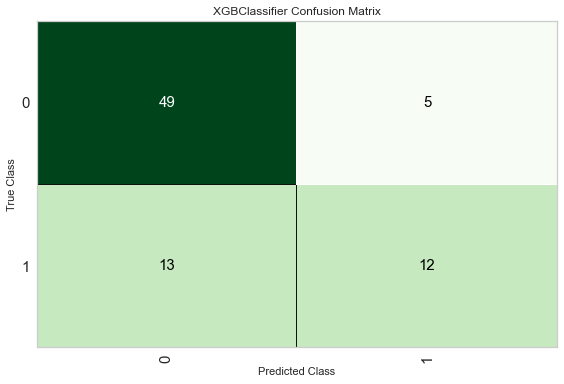

In [11]:
plot_model(tuned_xgb, plot = 'confusion_matrix')

Model Plots

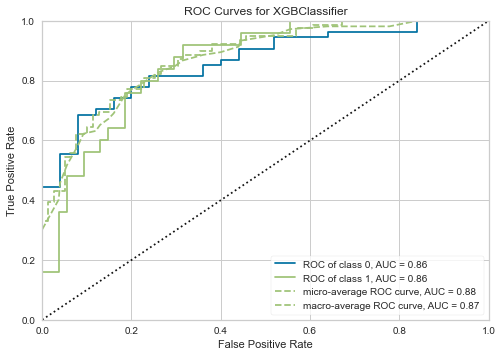

In [12]:
plot_model(tuned_xgb, plot = 'auc')

Precision Recall Plot

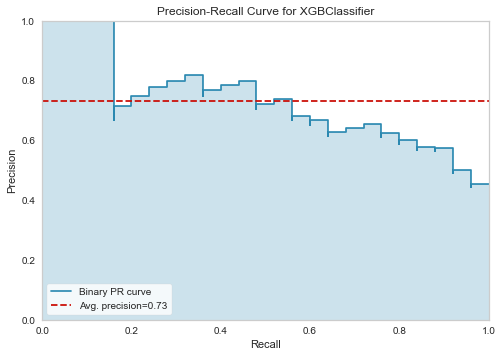

In [13]:
plot_model(tuned_xgb, plot = 'pr')

Feature Importance Plot

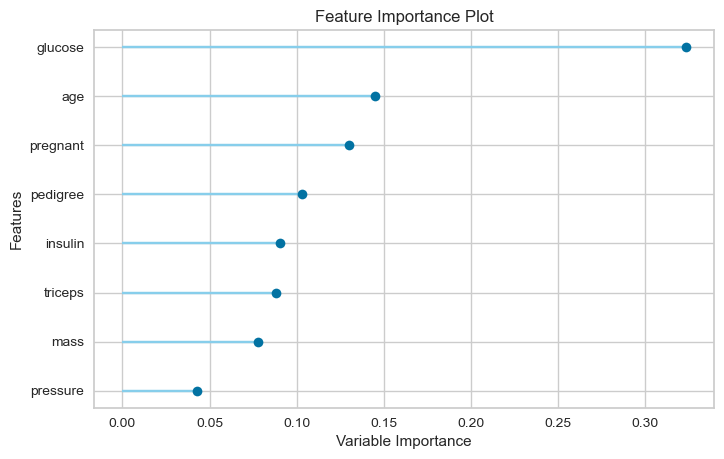

In [14]:
plot_model(tuned_xgb, plot='feature')

Calibration Plot

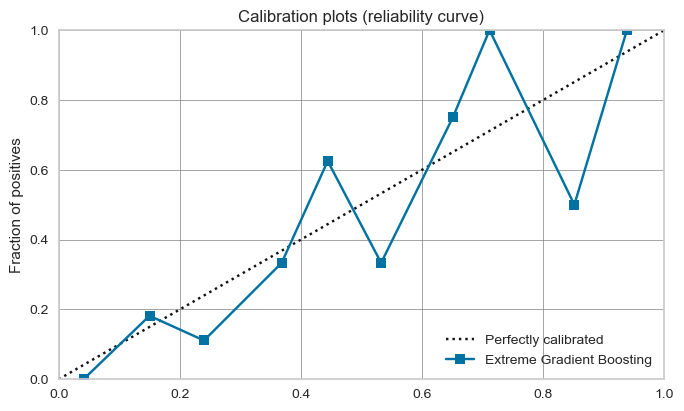

In [15]:
plot_model(tuned_xgb, plot='calibration')

Model Evaluation Interface

In [16]:
evaluate_model(tuned_xgb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Model Interpretation

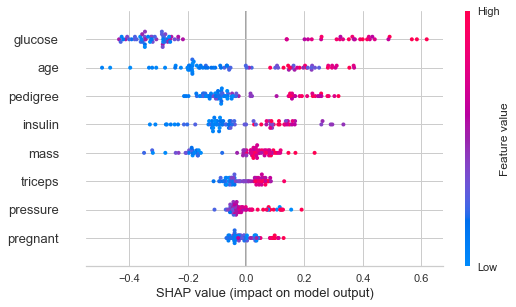

In [17]:
interpret_model(tuned_xgb, plot = 'summary')

Prediction on holdout set

In [18]:
predict_model(tuned_xgb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7722,0.8615,0.4800,0.7059,0.5714,0.4238,0.4384


,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes,Label,Score
0,-0.711777,-0.915100,0.924939,-0.393923,0.190420,0.230849,-0.862556,1.176005,pos,neg,0.5037
1,-0.085093,1.096365,-0.056437,0.084718,1.408120,0.299717,-0.546189,0.398830,pos,pos,0.5409
2,1.168275,0.393949,0.270688,-0.298195,-0.179826,-1.008766,0.317404,1.953179,neg,pos,0.5323
3,-0.398435,0.649373,-1.037813,0.371902,-0.179826,-0.237450,-0.323878,-0.572639,pos,neg,0.5190
4,2.108301,-0.723531,0.434251,1.807824,0.190420,-0.058394,-1.039264,3.118942,neg,neg,0.5253
...,...,...,...,...,...,...,...,...,...,...,...
74,-1.025119,0.106597,0.761376,0.754815,0.437251,0.409905,0.764877,-0.766933,neg,neg,0.5392
75,-0.398435,-1.777156,-0.710688,-1.542660,-1.167150,-1.821403,-0.794152,-0.766933,neg,neg,0.7738
76,-0.085093,-0.691603,-2.182751,-0.872563,-0.517162,-0.347638,-0.386581,-0.475492,neg,neg,0.7069
77,-0.085093,-1.585588,-0.220000,-0.106738,-0.920319,-0.499147,-0.691547,-0.766933,neg,neg,0.7488


Model finalization

In [19]:
final_gbc = finalize_model(tuned_xgb)

In [20]:
final_gbc

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.101, max_delta_step=0, max_depth=7,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', predictor='auto', random_state=0,
              reg_alpha=0.3, reg_lambda=3, scale_pos_weight=1.3, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

Saving final model

In [21]:
save_model(tuned_xgb,'Final tuned_xgb Model 11July2020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['pregnant'],
                                       target='diabetes', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 n...
                                interaction_constraints='', learning_rate=0.101,
                                max_delta_step=0, max_depth=7,
                                min_child_weight=2, missing=nan,
                                monotone_constraints='()', n_esti

Loading saved model

In [22]:
saved_final_lightxgb = load_model('Final tuned_xgb Model 11July2020')

Transformation Pipeline and Model Successfully Loaded


Prediction

In [23]:
new_prediction = predict_model(saved_final_lightxgb)
new_prediction.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7722,0.8615,0.4800,0.7059,0.5714,0.4238,0.4384


,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes,Label,Score
0,-0.711777,-0.915100,0.924939,-0.393923,0.190420,0.230849,-0.862556,1.176005,pos,neg,0.5037
1,-0.085093,1.096365,-0.056437,0.084718,1.408120,0.299717,-0.546189,0.398830,pos,pos,0.5409
2,1.168275,0.393949,0.270688,-0.298195,-0.179826,-1.008766,0.317404,1.953179,neg,pos,0.5323
3,-0.398435,0.649373,-1.037813,0.371902,-0.179826,-0.237450,-0.323878,-0.572639,pos,neg,0.5190
4,2.108301,-0.723531,0.434251,1.807824,0.190420,-0.058394,-1.039264,3.118942,neg,neg,0.5253
